# Composite meteorological and oceanic variables during the onset of various MHW classes

The goal of the code is to investigate the influence of various variables on the onset of surface, extended and sub-surface marine heatwaves (MHWs). The code also creates figure 4 and S2 from the related article.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import datetime
import pandas as pd 
from datetime import date
from datetime import timedelta
import matplotlib.dates as mdates
import glob
import shelve
import seaborn as sns
import matplotlib.patheffects as path_effects


In [2]:
plot_folder = 'FIGURES/' # # including 2019
ClimatologyPeriod=[1992,2020]
colours = (plt.rcParams['axes.prop_cycle'].by_key()['color'])


# Import data SST

In [3]:
## Get the data from file
Name_platform = 'SST_ESA'
d = shelve.open('DATA_processed/SSAVE_' + Name_platform + '_mhws_Strength2018_sst2019')  # open -- file may get suffix added by low-level                          # library
mhws_SST = d['dict_mhws']  
clim_SST = d['dict_clim']
d.close()    
        
## Explore
print(clim_SST.keys()) #prints keys and values
print(mhws_SST.keys()) #prints keys and values



dict_keys(['thresh', 'seas', 'seas_climYear', 'thresh_climYear', 'seas_climYear_std', 'seas_climYear_NB', 'missing', 'sst', 'times_dates', 't', 'list_MHWstats_1_0', 'sst_ano_thresh', 'sst_ano'])
dict_keys(['time_start', 'time_end', 'time_peak', 'date_start', 'date_end', 'date_peak', 'index_start', 'index_end', 'index_peak', 'duration', 'duration_moderate', 'duration_strong', 'duration_severe', 'duration_extreme', 'intensity_max', 'intensity_mean', 'intensity_var', 'intensity_cumulative', 'intensity_max_relThresh', 'intensity_mean_relThresh', 'intensity_var_relThresh', 'intensity_cumulative_relThresh', 'intensity_max_abs', 'intensity_mean_abs', 'intensity_var_abs', 'intensity_cumulative_abs', 'intensity_max_norm', 'category', 'intensity_mean_norm', 'rate_onset', 'rate_decline', 'intensity_time_series', 't_time_series', 'n_events'])


# Import ADCP data 


In [4]:
## Load daily averages
d = shelve.open('DATA_raw_other/SSAVE_ADCPdaily_2020_v2')      
df_ADCP_all_daily = d['df_ADCP_all_daily']                
df_ADCP_all = d['df_ADCP_all'] 
d.close()  

df_ADCP_all_daily.index = pd.to_datetime(df_ADCP_all_daily.index)
df_ADCP_all_daily

,ADCP_VCUR_ROT_int,ADCP_UCUR_ROT_int,ADCP_VCUR_17m,ADCP_UCUR_17m,ADCP_VCUR_53m,ADCP_UCUR_53m,ADCP_VCUR_ROT_int_ANO,ADCP_UCUR_ROT_int_ANO,ADCP_VCUR_17m_ANO,ADCP_UCUR_17m_ANO,ADCP_VCUR_53m_ANO,ADCP_UCUR_53m_ANO,ADCP_VCUR_ROT_int_STD,ADCP_UCUR_ROT_int_STD,ADCP_VCUR_17m_STD,ADCP_UCUR_17m_STD,ADCP_VCUR_53m_STD,ADCP_UCUR_53m_STD
1992-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.150836,0.014663,0.212240,0.060906,0.102901,0.043348
1992-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.151687,0.014680,0.213449,0.061005,0.103705,0.043475
1992-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152544,0.014705,0.214547,0.061100,0.104587,0.043650
1992-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153501,0.014773,0.215777,0.061236,0.105537,0.043892
1992-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154657,0.014854,0.217236,0.061465,0.106588,0.044153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,-0.195,-0.002,-0.335,-0.104,-0.064,-0.031,-0.156411,0.004120,-0.249712,-0.074495,-0.052366,-0.017974,0.145137,0.014439,0.204315,0.058821,0.098572,0.042129
2019-12-28,-0.259,0.014,-0.441,-0.088,-0.115,-0.040,-0.219624,0.020256,-0.354803,-0.058174,-0.102850,-0.026627,0.146214,0.014500,0.205899,0.059284,0.099274,0.042371
2019-12-29,-0.109,-0.001,-0.249,-0.070,-0.006,0.007,-0.068821,0.005387,-0.161847,-0.039852,0.006659,0.020730,0.147367,0.014550,0.207448,0.059721,0.100142,0.042686
2019-12-30,-0.004,-0.017,-0.155,-0.039,0.104,-0.003,0.037107,-0.010495,-0.066767,-0.008485,0.117311,0.011085,0.148664,0.014590,0.209204,0.060224,0.101138,0.043029


# Import BOM data

In [5]:
## Load daily averages
d = shelve.open('DATA_raw_other/SSAVE_BOM_Syd_airportdaily_2020_v2')
df_BOM_all_daily = d['df_BOM_all_daily']                
#df_BOM_all = d['df_BOM_all'] 
d.close()  

df_BOM_all_daily.index = pd.to_datetime(df_BOM_all_daily.index)
df_BOM_all_daily

,Precip_since9AM_mm,Wind_speed_ms,Wind_v,Wind_u,Wind_tau_v,Wind_tau_u,Air_temp,Rel_hum_perc,Wind_MSLP,Precip_since9AM_mm_MAX,...,Wind_speed_STD,Air_temp_STD,Wind_u_rot,Wind_v_rot,Wind_tau_u_rot,Wind_tau_v_rot,Wind_tau_u_rot_ANO,Wind_tau_v_rot_ANO,Wind_tau_u_rot_STD,Wind_tau_v_rot_STD
index,,,,,,,,,,,,,,,,,,,,,
1992-01-01,NaN,NaN,NaN,NaN,NaN,NaN,22.372,82.837,1007.163,NaN,...,1.565699,2.423014,NaN,NaN,NaN,NaN,NaN,NaN,0.017827,0.043765
1992-01-02,NaN,NaN,NaN,NaN,NaN,NaN,21.660,78.255,1011.617,NaN,...,1.569955,2.417255,NaN,NaN,NaN,NaN,NaN,NaN,0.017676,0.043966
1992-01-03,NaN,NaN,NaN,NaN,NaN,NaN,21.929,82.500,1007.024,NaN,...,1.575679,2.414121,NaN,NaN,NaN,NaN,NaN,NaN,0.017529,0.044255
1992-01-04,NaN,NaN,NaN,NaN,NaN,NaN,16.600,79.378,1001.841,NaN,...,1.581932,2.411294,NaN,NaN,NaN,NaN,NaN,NaN,0.017383,0.044573
1992-01-05,NaN,NaN,NaN,NaN,NaN,NaN,17.750,75.295,1006.636,NaN,...,1.587011,2.407399,NaN,NaN,NaN,NaN,NaN,NaN,0.017265,0.044731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.0,7.704,-6.333,-4.085,-0.067305,-0.043414,24.456,59.083,1018.502,0.0,...,1.553926,2.429648,-2.306706,-7.174484,-0.024515,-0.076248,-0.011392,-0.078667,0.018325,0.043272
2019-12-28,0.0,6.108,-4.912,-3.446,-0.037856,-0.026558,24.646,63.229,1015.537,0.0,...,1.556894,2.432219,-2.057261,-5.636518,-0.015855,-0.043439,-0.002646,-0.046011,0.018280,0.043357
2019-12-29,0.0,3.576,-1.847,-2.115,-0.007416,-0.008493,24.031,69.833,1014.492,0.0,...,1.559990,2.435575,-1.564894,-2.331467,-0.006284,-0.009362,0.007051,-0.012075,0.018237,0.043450


# Import GEO data

In [6]:
## Load daily averages
d = shelve.open('DATA_raw_other/SSAVE_34_151_4daily_2020_v2')      
df_GEO_all_daily = d['df_GEO_all_daily']                
df_GEO_all = d['df_GEO_all'] 
d.close()  

df_GEO_all_daily

,GEO_UCUR,GEO_VCUR,GEO_UCUR_rot,GEO_VCUR_rot,GEO_GSLA,GEO_UCUR_ANO,GEO_VCUR_ANO,GEO_UCUR_rot_ANO,GEO_VCUR_rot_ANO,GEO_UCUR_rot_STD,GEO_VCUR_rot_STD,GEO_GSLA_ANO
1992-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146920,0.318596,NaN
1992-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.147055,0.320929,NaN
1992-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.147268,0.323382,NaN
1992-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.147546,0.325859,NaN
1992-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.147894,0.328321,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146854,0.307157,NaN
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146892,0.309373,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146888,0.311675,NaN
2019-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146883,0.313983,NaN


# Import ERA5 data 

In [7]:
## Load daily averages
d = shelve.open('DATA_raw_other/SSAVE_ERA5_SYDdaily_2020')      
df_ERA5_all_daily = d['df_ERA5_all_daily']                
d.close()  

df_ERA5_all_daily

,QLW,QNET,QSW,QSENS,QLAT,WINDX,WINDY,WIND,SSTera5,T2Mera5,...,QSENS_large_ANO,QSENS_large_STD,WINDX_large_ANO,WINDX_large_STD,WINDY_large_ANO,WINDY_large_STD,WIND_large_ANO,WIND_large_STD,SSTera5_large_ANO,SSTera5_large_STD
1992-01-01,-39.339767,82.766884,217.405548,-6.787231,-88.511665,-2.333716,-5.381934,6.106609,21.855865,21.726761,...,4.893883,16.329511,-2.243207,2.649010,-5.980591,5.392189,1.625785,2.264583,-0.390727,0.771790
1992-01-02,-61.004326,101.463844,278.423035,-21.206793,-94.748077,-0.834330,5.959150,6.169837,21.487335,20.460114,...,6.097384,16.321508,1.328806,2.635426,0.737912,5.399648,-4.762126,2.263570,-0.773042,0.772805
1992-01-03,-35.807209,138.350357,240.179276,-14.163921,-51.857780,-1.614849,0.887314,5.075078,21.134644,20.593147,...,9.303376,16.339284,-0.089102,2.622601,-2.176607,5.406280,-2.015285,2.264144,-1.162027,0.773775
1992-01-04,-75.201584,-45.966133,213.645432,-30.565311,-153.844666,5.324850,3.654586,7.353973,20.958832,18.271034,...,-18.258490,16.350513,9.329454,2.608086,3.930937,5.413794,1.989246,2.265103,-1.382541,0.774867
1992-01-05,-79.815125,-4.501793,250.590027,-24.241884,-151.034805,3.550818,-0.219716,4.184144,21.016296,18.535789,...,-19.086158,16.333796,8.094447,2.593191,2.909833,5.416096,0.667942,2.266781,-1.363560,0.776252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,-90.105621,133.231369,374.250732,-16.205223,-134.708527,-3.588104,-6.504250,7.570815,22.397461,22.115143,...,7.270433,16.292107,-1.558023,2.656397,-6.304234,5.376583,1.607032,2.287189,0.582020,0.759089
2019-12-28,-93.947952,170.305374,379.007568,-11.905830,-102.848427,-3.393966,-6.458878,7.366675,22.456207,22.540092,...,13.467254,16.324588,-0.842626,2.662288,-8.421849,5.381114,3.225207,2.280251,0.447629,0.762333
2019-12-29,-81.088745,209.480438,366.032806,-13.317856,-62.145760,-3.365187,-4.265198,5.622786,22.802979,22.677689,...,12.461798,16.369118,-1.510323,2.667361,-7.565442,5.384273,2.682720,2.274883,0.292171,0.765456
2019-12-30,-88.680351,178.695801,375.443359,-5.522926,-102.544296,-3.514915,-7.564573,8.403537,22.439514,22.976059,...,22.492472,16.373900,-1.390325,2.666939,-10.399253,5.386409,5.292326,2.269613,0.380517,0.768225


# Comparison ERA5 and in situ wind

C:\Users\Amandine\AppData\Local\Temp\ipykernel_24220\3113441782.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax =plt.subplot(2,2,1)


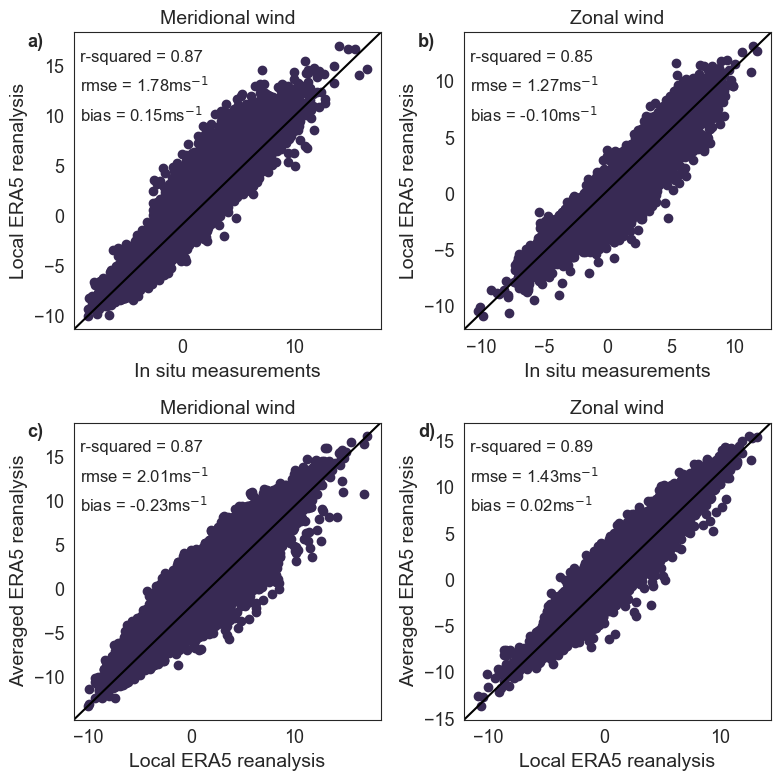

In [28]:
#### ARCTICLE figure S2

customPalette = sns.color_palette("mako", 4)
sns.set_palette(customPalette)


fig = plt.subplots(figsize=(8,8))

ax =plt.subplot(2,2,1)
y = df_ERA5_all_daily.WINDY.values
x = df_BOM_all_daily.Wind_v.values
plt.scatter(x,y)
plt.title("Meridional wind", fontsize=14)
plt.ylabel('Local ERA5 reanalysis', fontsize=14)
plt.xlabel('In situ measurements', fontsize=14)

from scipy import stats
# Trend: linear regression
nogaps = (~np.isnan(x) & ~np.isnan(y))    
slope, intercept, r_value, p_value, std_err = stats.linregress(x[nogaps],y[nogaps]) 
mse = np.square(np.subtract(x[nogaps],y[nogaps])).mean()
rmse = np.sqrt(mse)
bias = (y[nogaps]-x[nogaps]).mean()

ax.annotate("r-squared = {:.2f}".format(r_value**2), (0.02, 0.9), fontsize=12,xycoords="axes fraction")
ax.annotate("rmse = {:.2f}".format(rmse) + 'ms$^{-1}$', (0.02, 0.8), fontsize=12,xycoords="axes fraction")
ax.annotate("bias = {:.2f}".format(bias) + 'ms$^{-1}$', (0.02, 0.7), fontsize=12,xycoords="axes fraction")
ax.plot([0,1],[0,1],'k', transform=ax.transAxes)
ax.annotate("a)", xy=(-0.15, 0.95), xycoords="axes fraction", fontweight="bold")


##########
ax =plt.subplot(2,2,3)
x = df_ERA5_all_daily.WINDY.values
y = df_ERA5_all_daily.WINDY_large.values
plt.scatter(x,y)
plt.title("Meridional wind", fontsize=14)
plt.xlabel('Local ERA5 reanalysis', fontsize=14)
plt.ylabel('Averaged ERA5 reanalysis', fontsize=14)

from scipy import stats
# Trend: linear regression
nogaps = (~np.isnan(x) & ~np.isnan(y))    
slope, intercept, r_value, p_value, std_err = stats.linregress(x[nogaps],y[nogaps]) 
mse = np.square(np.subtract(x[nogaps],y[nogaps])).mean()
rmse = np.sqrt(mse)
bias = (y[nogaps]-x[nogaps]).mean()

ax.annotate("r-squared = {:.2f}".format(r_value**2), (0.02, 0.9), fontsize=12,xycoords="axes fraction")
ax.annotate("rmse = {:.2f}".format(rmse) + 'ms$^{-1}$', (0.02, 0.8), fontsize=12,xycoords="axes fraction")
ax.annotate("bias = {:.2f}".format(bias) + 'ms$^{-1}$', (0.02, 0.7), fontsize=12,xycoords="axes fraction")
ax.plot([0,1],[0,1],'k', transform=ax.transAxes)
ax.annotate("c)", xy=(-0.15, 0.95), xycoords="axes fraction", fontweight="bold")
ax.set_rasterized(True)



################
# U
################
ax =plt.subplot(2,2,2)
y = df_ERA5_all_daily.WINDX.values
x = df_BOM_all_daily.Wind_u.values
plt.scatter(x,y)
plt.title("Zonal wind", fontsize=14)
plt.ylabel('Local ERA5 reanalysis', fontsize=14)
plt.xlabel('In situ measurements', fontsize=14)

from scipy import stats
# Trend: linear regression
nogaps = (~np.isnan(x) & ~np.isnan(y))    
slope, intercept, r_value, p_value, std_err = stats.linregress(x[nogaps],y[nogaps]) 
mse = np.square(np.subtract(x[nogaps],y[nogaps])).mean()
rmse = np.sqrt(mse)
bias = (y[nogaps]-x[nogaps]).mean()

ax.annotate("r-squared = {:.2f}".format(r_value**2), (0.02, 0.9), fontsize=12,xycoords="axes fraction")
ax.annotate("rmse = {:.2f}".format(rmse) + 'ms$^{-1}$', (0.02, 0.8), fontsize=12,xycoords="axes fraction")
ax.annotate("bias = {:.2f}".format(bias) + 'ms$^{-1}$', (0.02, 0.7), fontsize=12,xycoords="axes fraction")
ax.plot([0,1],[0,1],'k', transform=ax.transAxes)
ax.annotate("b)", xy=(-0.15, 0.95), xycoords="axes fraction", fontweight="bold")
ax.set_rasterized(True)
ax.set_rasterized(True)


##########
ax =plt.subplot(2,2,4)
x = df_ERA5_all_daily.WINDX.values
y = df_ERA5_all_daily.WINDX_large.values
plt.scatter(x,y)
plt.title("Zonal wind", fontsize=14)
plt.xlabel('Local ERA5 reanalysis', fontsize=14)
plt.ylabel('Averaged ERA5 reanalysis', fontsize=14)

from scipy import stats
# Trend: linear regression
nogaps = (~np.isnan(x) & ~np.isnan(y))    
slope, intercept, r_value, p_value, std_err = stats.linregress(x[nogaps],y[nogaps]) 
mse = np.square(np.subtract(x[nogaps],y[nogaps])).mean()
rmse = np.sqrt(mse)
bias = (y[nogaps]-x[nogaps]).mean()

ax.annotate("r-squared = {:.2f}".format(r_value**2), (0.02, 0.9), fontsize=12,xycoords="axes fraction")
ax.annotate("rmse = {:.2f}".format(rmse) + 'ms$^{-1}$', (0.02, 0.8), fontsize=12,xycoords="axes fraction")
ax.annotate("bias = {:.2f}".format(bias) + 'ms$^{-1}$', (0.02, 0.7), fontsize=12,xycoords="axes fraction")
ax.plot([0,1],[0,1],'k', transform=ax.transAxes)
ax.annotate("d)", xy=(-0.15, 0.95), xycoords="axes fraction", fontweight="bold")
ax.set_rasterized(True)

plt.tight_layout()

plt.savefig(plot_folder + 'plot_scatter_wind_all.png', bbox_inches='tight', pad_inches=0.5, dpi=150)
plt.savefig(plot_folder + 'plot_scatter_wind_all_rasterised.pdf')  
plt.show()



# Import data ORS065

# LOOP execute functions for each file / depth

In [9]:
#### Dataset
Name_platform = 'ORS065_2020'
list_FILES = sorted(glob.glob('DATA_processed/SAVE_' + Name_platform + '_mhws_Strength2018' + '_z*.dir')) #print(list_FILES[0][0:-4])
N_FILES = len(list_FILES)

### Loop all files depths
for f in range(N_FILES):
    FILE = list_FILES[f][0:-4]     
    print(FILE)

    d = shelve.open(FILE)  # Note: getting rid of .dir!
    depth = d['DEPTHS'] 
    mhws_ORS065 = d['dict_mhws']  
    clim_ORS065 = d['dict_clim']
    year_stats_ORS065 = d['dict_year_stats']
    d.close()    
    
    if depth==20:
        mhws_ORS065_20m = mhws_ORS065
    if depth==25:
        mhws_ORS065_25m = mhws_ORS065
    if depth==30:
        mhws_ORS065_30m = mhws_ORS065
    if depth==35:
        mhws_ORS065_35m = mhws_ORS065
    if depth==40:
        mhws_ORS065_40m = mhws_ORS065
    if depth==45:
        mhws_ORS065_45m = mhws_ORS065
    if depth==50:
        mhws_ORS065_50m = mhws_ORS065
    if depth==53:
        mhws_ORS065_53m = mhws_ORS065




In [11]:
# IMPORT TIMES for MHW types

import shelve
d = shelve.open('DATA_processed/SSAVE_ORS065times_MHWtypes_daily_2020_sst2019') 
common_times_baro = d['common_times_baro']              
common_times_depth = d['common_times_depth']              
common_times_surf = d['common_times_surf']        
events_mhws_ORS065_15m_peaks_ind_SURF = d['events_mhws_ORS065_15m_peaks_ind_SURF']          
events_mhws_ORS065_30m_peaks_ind_BARO = d['events_mhws_ORS065_30m_peaks_ind_BARO']           
events_mhws_ORS065_53m_peaks_ind_DEEP = d['events_mhws_ORS065_53m_peaks_ind_DEEP']      
d.close()  

# Composite of ERA5 FLUX per MHW class during the onset of events

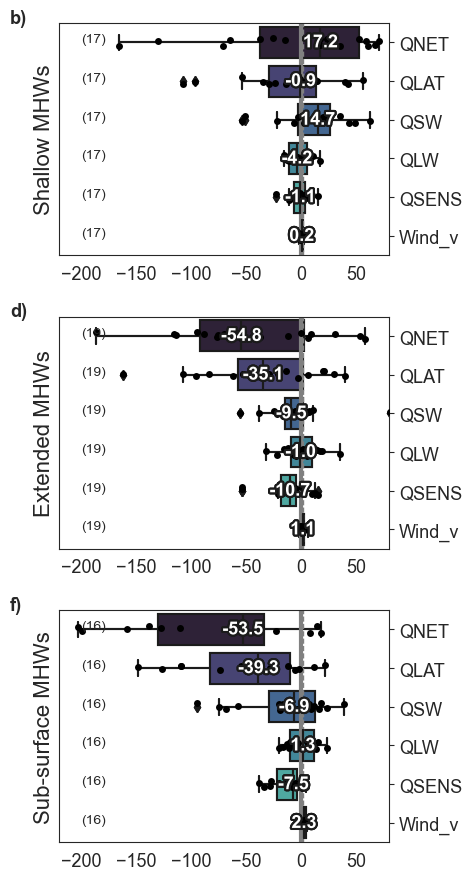

In [15]:
#### ARCTICLE figure S4 right


sns.set_style('white')
customPalette = sns.color_palette("mako", 6)
sns.set_palette(customPalette)
plt.rc('font', size=13)


# For boxplot with median
def add_median_labels(ax, precision='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{precision}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])


### Composites for extended events
xx = df_ERA5_all_daily['QNET_ANO'] #/ df_ERA5_all_daily['QNET_STD']
xx_ave = [np.nanmean(xx[events_mhws_ORS065_30m_peaks_ind_BARO[i]-7:events_mhws_ORS065_30m_peaks_ind_BARO[i]]) for i in range(len(events_mhws_ORS065_30m_peaks_ind_BARO))]
yy = df_ERA5_all_daily['QLAT_ANO'] #/ df_ERA5_all_daily['QLAT_STD']
yy_ave = [np.nanmean(yy[events_mhws_ORS065_30m_peaks_ind_BARO[i]-7:events_mhws_ORS065_30m_peaks_ind_BARO[i]]) for i in range(len(events_mhws_ORS065_30m_peaks_ind_BARO))]
zz = df_ERA5_all_daily['QSW_ANO'] #/ df_ERA5_all_daily['QSW_STD']
zz_ave = [np.nanmean(zz[events_mhws_ORS065_30m_peaks_ind_BARO[i]-7:events_mhws_ORS065_30m_peaks_ind_BARO[i]]) for i in range(len(events_mhws_ORS065_30m_peaks_ind_BARO))]
aa = df_ERA5_all_daily['QLW_ANO']# / df_ERA5_all_daily['QLW_STD']
aa_ave = [np.nanmean(aa[events_mhws_ORS065_30m_peaks_ind_BARO[i]-7:events_mhws_ORS065_30m_peaks_ind_BARO[i]]) for i in range(len(events_mhws_ORS065_30m_peaks_ind_BARO))]
bb = df_ERA5_all_daily['QSENS_ANO'] #/ (df_ERA5_all_daily['QSENS_STD'])
bb_ave = [np.nanmean(bb[events_mhws_ORS065_30m_peaks_ind_BARO[i]-7:events_mhws_ORS065_30m_peaks_ind_BARO[i]]) for i in range(len(events_mhws_ORS065_30m_peaks_ind_BARO))]
cc = df_ERA5_all_daily['WINDY_ANO'] #/ (df_ERA5_all_daily['WINDY_STD'])
cc_ave = [np.nanmean(cc[events_mhws_ORS065_30m_peaks_ind_BARO[i]-7:events_mhws_ORS065_30m_peaks_ind_BARO[i]]) for i in range(len(events_mhws_ORS065_30m_peaks_ind_BARO))]

df1 = pd.DataFrame({'y': xx_ave,'label':"QNET"})
df2 = pd.DataFrame({'y': yy_ave,'label':"QLAT"})
df3 = pd.DataFrame({'y': zz_ave,'label':"QSW"})
df4 = pd.DataFrame({'y': aa_ave,'label':"QLW"})
df5 = pd.DataFrame({'y': bb_ave,'label':"QSENS"})
df6 = pd.DataFrame({'y': cc_ave,'label':"Wind_v"})
data = pd.concat([df1, df2, df3, df4, df5,df6])
data = data.dropna()

# Boxplot
fig = plt.figure(figsize=(5,9))
ax =plt.subplot(3,1,2)
ax = sns.stripplot(y ="label", x="y", data=data,color='k')
for i_fly, show_fliers in enumerate([True, False]):
    ax = sns.boxplot(y="label", x="y", data=data)
    add_median_labels(ax)
ax.annotate("(" + str(df1.dropna().shape[0]) + ")", xy=(-200, 0),fontsize=10)
ax.annotate("(" + str(df2.dropna().shape[0]) + ")", xy=(-200, 1),fontsize=10)
ax.annotate("(" + str(df3.dropna().shape[0]) + ")", xy=(-200, 2),fontsize=10)
ax.annotate("(" + str(df4.dropna().shape[0]) + ")", xy=(-200, 3),fontsize=10)
ax.annotate("(" + str(df5.dropna().shape[0]) + ")", xy=(-200, 4),fontsize=10)
ax.annotate("(" + str(df6.dropna().shape[0]) + ")", xy=(-200, 5),fontsize=10)

plt.ylabel('Extended MHWs', fontsize = 16)
plt.xlabel('')
plt.xlim([-220,80])
plt.axvline(0, color='grey',linewidth=3,linestyle='solid')
plt.axvline(1, color='grey',linewidth=1,linestyle='dashed')
plt.axvline(-1, color='grey',linewidth=1,linestyle='dashed')
ax.yaxis.tick_right()
ax.annotate("d)", xy=(-0.15, 1), xycoords="axes fraction", fontweight="bold")



### Composites for sub-surface events
xx = df_ERA5_all_daily['QNET_ANO'] #/ df_ERA5_all_daily['QNET_STD']
xx_ave = [np.nanmean(xx[events_mhws_ORS065_53m_peaks_ind_DEEP[i]-7:events_mhws_ORS065_53m_peaks_ind_DEEP[i]]) for i in range(len(events_mhws_ORS065_53m_peaks_ind_DEEP))]
yy = df_ERA5_all_daily['QLAT_ANO'] #/ df_ERA5_all_daily['QLAT_STD']
yy_ave = [np.nanmean(yy[events_mhws_ORS065_53m_peaks_ind_DEEP[i]-7:events_mhws_ORS065_53m_peaks_ind_DEEP[i]]) for i in range(len(events_mhws_ORS065_53m_peaks_ind_DEEP))]
zz = df_ERA5_all_daily['QSW_ANO'] #/ df_ERA5_all_daily['QSW_STD']
zz_ave = [np.nanmean(zz[events_mhws_ORS065_53m_peaks_ind_DEEP[i]-7:events_mhws_ORS065_53m_peaks_ind_DEEP[i]]) for i in range(len(events_mhws_ORS065_53m_peaks_ind_DEEP))]
aa = df_ERA5_all_daily['QLW_ANO'] #/ df_ERA5_all_daily['QLW_STD']
aa_ave = [np.nanmean(aa[events_mhws_ORS065_53m_peaks_ind_DEEP[i]-7:events_mhws_ORS065_53m_peaks_ind_DEEP[i]]) for i in range(len(events_mhws_ORS065_53m_peaks_ind_DEEP))]
bb = df_ERA5_all_daily['QSENS_ANO'] #/ (df_ERA5_all_daily['QSENS_STD'])
bb_ave = [np.nanmean(bb[events_mhws_ORS065_53m_peaks_ind_DEEP[i]-7:events_mhws_ORS065_53m_peaks_ind_DEEP[i]]) for i in range(len(events_mhws_ORS065_53m_peaks_ind_DEEP))]
cc = df_ERA5_all_daily['WINDY_ANO'] #/ (df_ERA5_all_daily['WINDY_STD'])
cc_ave = [np.nanmean(cc[events_mhws_ORS065_53m_peaks_ind_DEEP[i]-7:events_mhws_ORS065_53m_peaks_ind_DEEP[i]]) for i in range(len(events_mhws_ORS065_53m_peaks_ind_DEEP))]

df1 = pd.DataFrame({'y': xx_ave,'label':"QNET"})
df2 = pd.DataFrame({'y': yy_ave,'label':"QLAT"})
df3 = pd.DataFrame({'y': zz_ave,'label':"QSW"})
df4 = pd.DataFrame({'y': aa_ave,'label':"QLW"})
df5 = pd.DataFrame({'y': bb_ave,'label':"QSENS"})
df6 = pd.DataFrame({'y': cc_ave,'label':"Wind_v"})
data = pd.concat([df1, df2, df3, df4, df5,df6])
data = data.dropna()

# Boxplot
ax =plt.subplot(3,1,3)
ax = sns.stripplot(y ="label", x="y", data=data,color='k')
for i_fly, show_fliers in enumerate([True, False]):
    ax = sns.boxplot(y="label", x="y", data=data)
    add_median_labels(ax)
ax.annotate("(" + str(df1.dropna().shape[0]) + ")", xy=(-200, 0),fontsize=10)
ax.annotate("(" + str(df2.dropna().shape[0]) + ")", xy=(-200, 1),fontsize=10)
ax.annotate("(" + str(df3.dropna().shape[0]) + ")", xy=(-200, 2),fontsize=10)
ax.annotate("(" + str(df4.dropna().shape[0]) + ")", xy=(-200, 3),fontsize=10)
ax.annotate("(" + str(df5.dropna().shape[0]) + ")", xy=(-200, 4),fontsize=10)
ax.annotate("(" + str(df6.dropna().shape[0]) + ")", xy=(-200, 5),fontsize=10)

plt.ylabel('Sub-surface MHWs', fontsize = 16)
plt.xlabel('')
plt.xlim([-220,80])
plt.axvline(0, color='grey',linewidth=3,linestyle='solid')
plt.axvline(1, color='grey',linewidth=1,linestyle='dashed')
plt.axvline(-1, color='grey',linewidth=1,linestyle='dashed')
ax.yaxis.tick_right()
ax.annotate("f)", xy=(-0.15, 1), xycoords="axes fraction", fontweight="bold")


### Composites for shallow events
xx = df_ERA5_all_daily['QNET_ANO'] #/ df_ERA5_all_daily['QNET_STD']
xx_ave = [np.nanmean(xx[events_mhws_ORS065_15m_peaks_ind_SURF[i]-7:events_mhws_ORS065_15m_peaks_ind_SURF[i]]) for i in range(len(events_mhws_ORS065_15m_peaks_ind_SURF))]
yy = df_ERA5_all_daily['QLAT_ANO'] #/ df_ERA5_all_daily['QLAT_STD']
yy_ave = [np.nanmean(yy[events_mhws_ORS065_15m_peaks_ind_SURF[i]-7:events_mhws_ORS065_15m_peaks_ind_SURF[i]]) for i in range(len(events_mhws_ORS065_15m_peaks_ind_SURF))]
zz = df_ERA5_all_daily['QSW_ANO'] #/ df_ERA5_all_daily['QSW_STD']
zz_ave = [np.nanmean(zz[events_mhws_ORS065_15m_peaks_ind_SURF[i]-7:events_mhws_ORS065_15m_peaks_ind_SURF[i]]) for i in range(len(events_mhws_ORS065_15m_peaks_ind_SURF))]
aa = df_ERA5_all_daily['QLW_ANO'] #/ df_ERA5_all_daily['QLW_STD']
aa_ave = [np.nanmean(aa[events_mhws_ORS065_15m_peaks_ind_SURF[i]-7:events_mhws_ORS065_15m_peaks_ind_SURF[i]]) for i in range(len(events_mhws_ORS065_15m_peaks_ind_SURF))]
bb = df_ERA5_all_daily['QSENS_ANO'] #/ (df_ERA5_all_daily['QSENS_STD'])
bb_ave = [np.nanmean(bb[events_mhws_ORS065_15m_peaks_ind_SURF[i]-7:events_mhws_ORS065_15m_peaks_ind_SURF[i]]) for i in range(len(events_mhws_ORS065_15m_peaks_ind_SURF))]
cc = df_ERA5_all_daily['WINDY_ANO'] #/ (df_ERA5_all_daily['WINDY_STD'])
cc_ave = [np.nanmean(cc[events_mhws_ORS065_15m_peaks_ind_SURF[i]-7:events_mhws_ORS065_15m_peaks_ind_SURF[i]]) for i in range(len(events_mhws_ORS065_15m_peaks_ind_SURF))]

df1 = pd.DataFrame({'y': xx_ave,'label':"QNET"})
df2 = pd.DataFrame({'y': yy_ave,'label':"QLAT"})
df3 = pd.DataFrame({'y': zz_ave,'label':"QSW"})
df4 = pd.DataFrame({'y': aa_ave,'label':"QLW"})
df5 = pd.DataFrame({'y': bb_ave,'label':"QSENS"})
df6 = pd.DataFrame({'y': cc_ave,'label':"Wind_v"})
data = pd.concat([df1, df2, df3, df4, df5,df6])
data = data.dropna()

# Boxplot
ax = plt.subplot(3,1,1)
ax = sns.stripplot(y ="label", x="y", data=data,color='k')
for i_fly, show_fliers in enumerate([True, False]):
    ax = sns.boxplot(y="label", x="y", data=data)
    add_median_labels(ax)
ax.annotate("(" + str(df1.dropna().shape[0]) + ")", xy=(-200, 0),fontsize=10)
ax.annotate("(" + str(df2.dropna().shape[0]) + ")", xy=(-200, 1),fontsize=10)
ax.annotate("(" + str(df3.dropna().shape[0]) + ")", xy=(-200, 2),fontsize=10)
ax.annotate("(" + str(df4.dropna().shape[0]) + ")", xy=(-200, 3),fontsize=10)
ax.annotate("(" + str(df5.dropna().shape[0]) + ")", xy=(-200, 4),fontsize=10)
ax.annotate("(" + str(df6.dropna().shape[0]) + ")", xy=(-200, 5),fontsize=10)

plt.ylabel('Shallow MHWs', fontsize = 16)
plt.xlabel('')
plt.xlim([-220,80])
plt.axvline(0, color='grey',linewidth=3,linestyle='solid')
plt.axvline(1, color='grey',linewidth=1,linestyle='dashed')
plt.axvline(-1, color='grey',linewidth=1,linestyle='dashed')
ax.yaxis.tick_right()
ax.annotate("b)", xy=(-0.15, 1), xycoords="axes fraction", fontweight="bold")

# Save
plt.tight_layout()
plt.savefig(plot_folder + 'plot_MHWS_events_boxplot_ALL_ERA5.png', bbox_inches='tight', pad_inches=0.5, dpi=150)
plt.savefig(plot_folder + 'plot_MHWS_events_boxplot_ALL_ERA5.pdf')  
plt.show()


# Composite of observational variables per MHW class during the onset of events


C:\Users\Amandine\AppData\Local\Temp\ipykernel_24220\2377882886.py:29: RuntimeWarning: Mean of empty slice
  yy_ave = [np.nanmean(yy[events_mhws_ORS065_30m_peaks_ind_BARO[i]-7:events_mhws_ORS065_30m_peaks_ind_BARO[i]]) for i in range(len(events_mhws_ORS065_30m_peaks_ind_BARO))]
C:\Users\Amandine\AppData\Local\Temp\ipykernel_24220\2377882886.py:31: RuntimeWarning: Mean of empty slice
  zz_ave = [np.nanmean(zz[events_mhws_ORS065_30m_peaks_ind_BARO[i]-7:events_mhws_ORS065_30m_peaks_ind_BARO[i]]) for i in range(len(events_mhws_ORS065_30m_peaks_ind_BARO))]
C:\Users\Amandine\AppData\Local\Temp\ipykernel_24220\2377882886.py:33: RuntimeWarning: Mean of empty slice
  aa_ave = [np.nanmean(aa[events_mhws_ORS065_30m_peaks_ind_BARO[i]-7:events_mhws_ORS065_30m_peaks_ind_BARO[i]]) for i in range(len(events_mhws_ORS065_30m_peaks_ind_BARO))]
C:\Users\Amandine\AppData\Local\Temp\ipykernel_24220\2377882886.py:35: RuntimeWarning: Mean of empty slice
  bb_ave = [np.nanmean(bb[events_mhws_ORS065_30m_peaks_i

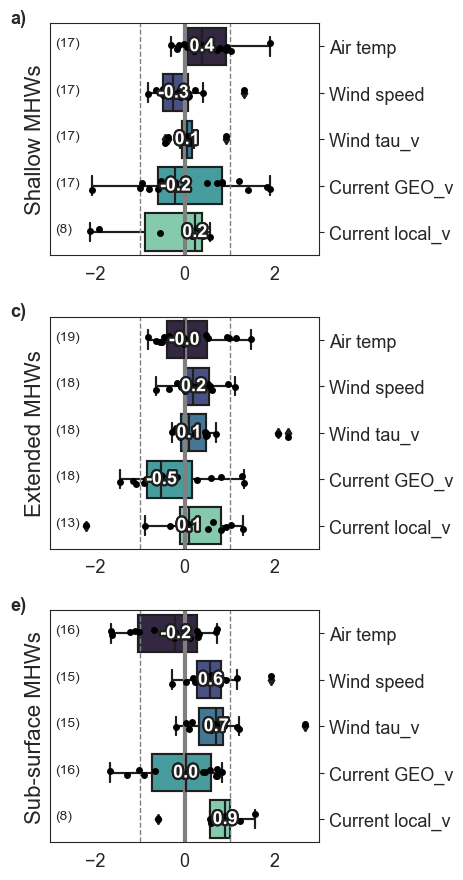

In [16]:
#### ARCTICLE figure S4 left


customPalette = sns.color_palette("mako", 5)
sns.set_palette(customPalette)
plt.rc('font', size=13)

def add_median_labels(ax, precision='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{precision}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])


### Composites for extended events
xx = df_BOM_all_daily['Air_temp_ANO'] / df_BOM_all_daily['Air_temp_STD']
xx_ave = [np.nanmean(xx[events_mhws_ORS065_30m_peaks_ind_BARO[i]-7:events_mhws_ORS065_30m_peaks_ind_BARO[i]]) for i in range(len(events_mhws_ORS065_30m_peaks_ind_BARO))]
yy = df_BOM_all_daily['Wind_speed_ANO'] / df_BOM_all_daily['Wind_speed_STD']
yy_ave = [np.nanmean(yy[events_mhws_ORS065_30m_peaks_ind_BARO[i]-7:events_mhws_ORS065_30m_peaks_ind_BARO[i]]) for i in range(len(events_mhws_ORS065_30m_peaks_ind_BARO))]
zz = df_BOM_all_daily['Wind_tau_v_rot_ANO'] / df_BOM_all_daily['Wind_tau_v_rot_STD']
zz_ave = [np.nanmean(zz[events_mhws_ORS065_30m_peaks_ind_BARO[i]-7:events_mhws_ORS065_30m_peaks_ind_BARO[i]]) for i in range(len(events_mhws_ORS065_30m_peaks_ind_BARO))]
aa = df_GEO_all_daily['GEO_VCUR_rot_ANO'] / df_GEO_all_daily['GEO_VCUR_rot_STD']
aa_ave = [np.nanmean(aa[events_mhws_ORS065_30m_peaks_ind_BARO[i]-7:events_mhws_ORS065_30m_peaks_ind_BARO[i]]) for i in range(len(events_mhws_ORS065_30m_peaks_ind_BARO))]
bb = df_ADCP_all_daily['ADCP_VCUR_ROT_int_ANO'] / (df_ADCP_all_daily['ADCP_VCUR_ROT_int_STD'])
bb_ave = [np.nanmean(bb[events_mhws_ORS065_30m_peaks_ind_BARO[i]-7:events_mhws_ORS065_30m_peaks_ind_BARO[i]]) for i in range(len(events_mhws_ORS065_30m_peaks_ind_BARO))]

df1 = pd.DataFrame({'y': xx_ave,'label':"Air temp"})  
df2 = pd.DataFrame({'y': yy_ave,'label':"Wind speed"})
df3 = pd.DataFrame({'y': zz_ave,'label':"Wind tau_v"})
df4 = pd.DataFrame({'y': aa_ave,'label':"Current GEO_v"})
df5 = pd.DataFrame({'y': bb_ave,'label':"Current local_v"})
data = pd.concat([df1, df2, df3, df4, df5])
data = data.dropna()

# Boxplot
fig = plt.figure(figsize=(5,9))
ax = plt.subplot(3,1,2)
ax = sns.stripplot(y ="label", x="y", data=data,color='k')
for i_fly, show_fliers in enumerate([True, False]):
    ax = sns.boxplot(y="label", x="y", data=data)
    add_median_labels(ax)
ax.annotate("(" + str(df1.dropna().shape[0]) + ")", xy=(-2.9, 0),fontsize=10)
ax.annotate("(" + str(df2.dropna().shape[0]) + ")", xy=(-2.9, 1),fontsize=10)
ax.annotate("(" + str(df3.dropna().shape[0]) + ")", xy=(-2.9, 2),fontsize=10)
ax.annotate("(" + str(df4.dropna().shape[0]) + ")", xy=(-2.9, 3),fontsize=10)
ax.annotate("(" + str(df5.dropna().shape[0]) + ")", xy=(-2.9, 4),fontsize=10)

plt.ylabel('Extended MHWs', fontsize = 16)
plt.xlabel('')
plt.xlim([-3,3])
plt.axvline(0, color='grey',linewidth=3,linestyle='solid')
plt.axvline(1, color='grey',linewidth=1,linestyle='dashed')
plt.axvline(-1, color='grey',linewidth=1,linestyle='dashed')
ax.yaxis.tick_right()
ax.annotate("c)", xy=(-0.15, 1), xycoords="axes fraction", fontweight="bold")


### Composites for sub-surface events
xx = df_BOM_all_daily['Air_temp_ANO'] / df_BOM_all_daily['Air_temp_STD']
xx_ave = [np.nanmean(xx[events_mhws_ORS065_53m_peaks_ind_DEEP[i]-7:events_mhws_ORS065_53m_peaks_ind_DEEP[i]]) for i in range(len(events_mhws_ORS065_53m_peaks_ind_DEEP))]
yy = df_BOM_all_daily['Wind_speed_ANO'] / df_BOM_all_daily['Wind_speed_STD']
yy_ave = [np.nanmean(yy[events_mhws_ORS065_53m_peaks_ind_DEEP[i]-7:events_mhws_ORS065_53m_peaks_ind_DEEP[i]]) for i in range(len(events_mhws_ORS065_53m_peaks_ind_DEEP))]
zz = df_BOM_all_daily['Wind_tau_v_rot_ANO'] / df_BOM_all_daily['Wind_tau_v_rot_STD']
zz_ave = [np.nanmean(zz[events_mhws_ORS065_53m_peaks_ind_DEEP[i]-7:events_mhws_ORS065_53m_peaks_ind_DEEP[i]]) for i in range(len(events_mhws_ORS065_53m_peaks_ind_DEEP))]
aa = df_GEO_all_daily['GEO_VCUR_rot_ANO'] / df_GEO_all_daily['GEO_VCUR_rot_STD']
aa_ave = [np.nanmean(aa[events_mhws_ORS065_53m_peaks_ind_DEEP[i]-7:events_mhws_ORS065_53m_peaks_ind_DEEP[i]]) for i in range(len(events_mhws_ORS065_53m_peaks_ind_DEEP))]
bb = df_ADCP_all_daily['ADCP_VCUR_ROT_int_ANO'] / (df_ADCP_all_daily['ADCP_VCUR_ROT_int_STD'])
bb_ave = [np.nanmean(bb[events_mhws_ORS065_53m_peaks_ind_DEEP[i]-7:events_mhws_ORS065_53m_peaks_ind_DEEP[i]]) for i in range(len(events_mhws_ORS065_53m_peaks_ind_DEEP))]

df1 = pd.DataFrame({'y': xx_ave,'label':"Air temp"})  
df2 = pd.DataFrame({'y': yy_ave,'label':"Wind speed"})
df3 = pd.DataFrame({'y': zz_ave,'label':"Wind tau_v"})
df4 = pd.DataFrame({'y': aa_ave,'label':"Current GEO_v"})
df5 = pd.DataFrame({'y': bb_ave,'label':"Current local_v"})
data = pd.concat([df1, df2, df3, df4, df5])
data = data.dropna()

## Boxplot
ax = plt.subplot(3,1,3)
ax = sns.stripplot(y ="label", x="y", data=data,color='k')
for i_fly, show_fliers in enumerate([True, False]):
    ax = sns.boxplot(y="label", x="y", data=data)
    add_median_labels(ax)
ax.annotate("(" + str(df1.dropna().shape[0]) + ")", xy=(-2.9, 0),fontsize=10)
ax.annotate("(" + str(df2.dropna().shape[0]) + ")", xy=(-2.9, 1),fontsize=10)
ax.annotate("(" + str(df3.dropna().shape[0]) + ")", xy=(-2.9, 2),fontsize=10)
ax.annotate("(" + str(df4.dropna().shape[0]) + ")", xy=(-2.9, 3),fontsize=10)
ax.annotate("(" + str(df5.dropna().shape[0]) + ")", xy=(-2.9, 4),fontsize=10)

plt.ylabel('Sub-surface MHWs', fontsize = 16)
plt.xlabel('')
plt.xlim([-3,3])
plt.axvline(0, color='grey',linewidth=3,linestyle='solid')
plt.axvline(1, color='grey',linewidth=1,linestyle='dashed')
plt.axvline(-1, color='grey',linewidth=1,linestyle='dashed')
ax.yaxis.tick_right()
ax.annotate("e)", xy=(-0.15, 1), xycoords="axes fraction", fontweight="bold")



### Composites for shallow events
xx = df_BOM_all_daily['Air_temp_ANO'] / df_BOM_all_daily['Air_temp_STD']
xx_ave = [np.nanmean(xx[events_mhws_ORS065_15m_peaks_ind_SURF[i]-7:events_mhws_ORS065_15m_peaks_ind_SURF[i]]) for i in range(len(events_mhws_ORS065_15m_peaks_ind_SURF))]
yy = df_BOM_all_daily['Wind_speed_ANO'] / df_BOM_all_daily['Wind_speed_STD']
yy_ave = [np.nanmean(yy[events_mhws_ORS065_15m_peaks_ind_SURF[i]-7:events_mhws_ORS065_15m_peaks_ind_SURF[i]]) for i in range(len(events_mhws_ORS065_15m_peaks_ind_SURF))]
zz = df_BOM_all_daily['Wind_tau_v_rot_ANO'] / df_BOM_all_daily['Wind_tau_v_rot_STD']
zz_ave = [np.nanmean(zz[events_mhws_ORS065_15m_peaks_ind_SURF[i]-7:events_mhws_ORS065_15m_peaks_ind_SURF[i]]) for i in range(len(events_mhws_ORS065_15m_peaks_ind_SURF))]
aa = df_GEO_all_daily['GEO_VCUR_rot_ANO'] / df_GEO_all_daily['GEO_VCUR_rot_STD']
aa_ave = [np.nanmean(aa[events_mhws_ORS065_15m_peaks_ind_SURF[i]-7:events_mhws_ORS065_15m_peaks_ind_SURF[i]]) for i in range(len(events_mhws_ORS065_15m_peaks_ind_SURF))]
bb = df_ADCP_all_daily['ADCP_VCUR_ROT_int_ANO'] / (df_ADCP_all_daily['ADCP_VCUR_ROT_int_STD'])
bb_ave = [np.nanmean(bb[events_mhws_ORS065_15m_peaks_ind_SURF[i]-7:events_mhws_ORS065_15m_peaks_ind_SURF[i]]) for i in range(len(events_mhws_ORS065_15m_peaks_ind_SURF))]

df1 = pd.DataFrame({'y': xx_ave,'label':"Air temp"})  
df2 = pd.DataFrame({'y': yy_ave,'label':"Wind speed"})
df3 = pd.DataFrame({'y': zz_ave,'label':"Wind tau_v"})
df4 = pd.DataFrame({'y': aa_ave,'label':"Current GEO_v"})
df5 = pd.DataFrame({'y': bb_ave,'label':"Current local_v"})
data = pd.concat([df1, df2, df3, df4, df5])
data = data.dropna()

# Boxplot
ax = plt.subplot(3,1,1)
ax = sns.stripplot(y ="label", x="y", data=data,color='k')
for i_fly, show_fliers in enumerate([True, False]):
    ax = sns.boxplot(y="label", x="y", data=data)
    add_median_labels(ax)
ax.annotate("(" + str(df1.dropna().shape[0]) + ")", xy=(-2.9, 0),fontsize=10)
ax.annotate("(" + str(df2.dropna().shape[0]) + ")", xy=(-2.9, 1),fontsize=10)
ax.annotate("(" + str(df3.dropna().shape[0]) + ")", xy=(-2.9, 2),fontsize=10)
ax.annotate("(" + str(df4.dropna().shape[0]) + ")", xy=(-2.9, 3),fontsize=10)
ax.annotate("(" + str(df5.dropna().shape[0]) + ")", xy=(-2.9, 4),fontsize=10)

plt.ylabel('Shallow MHWs', fontsize = 16)
plt.xlabel('')
plt.xlim([-3,3])
plt.axvline(0, color='grey',linewidth=3,linestyle='solid')
plt.axvline(1, color='grey',linewidth=1,linestyle='dashed')
plt.axvline(-1, color='grey',linewidth=1,linestyle='dashed')
ax.yaxis.tick_right()
ax.annotate("a)", xy=(-0.15, 1), xycoords="axes fraction", fontweight="bold")


# Save
plt.tight_layout()
plt.savefig(plot_folder + 'plot_MHWS_events_boxplot_ALL.png', bbox_inches='tight', pad_inches=0.5, dpi=150)
plt.savefig(plot_folder + 'plot_MHWS_events_boxplot_ALL.pdf')  
plt.show()
